In [22]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 0 #June 22nd, 2023
current_version = 1 #June 28th, 2023
current_version = 2 #June 28th, 2023

In [2]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching files for DS_16
Fetching files for DS_19
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_17
Fetching files for DS_22
Fetching files for DS_13
Fetching files for DS_23
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
ERROR: MULTIPLE REVERSALS IN ANIMAL BS_179
P:\Behavioor\BS_191\behavior\BS_191_1v2.txt: No 

../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in lon

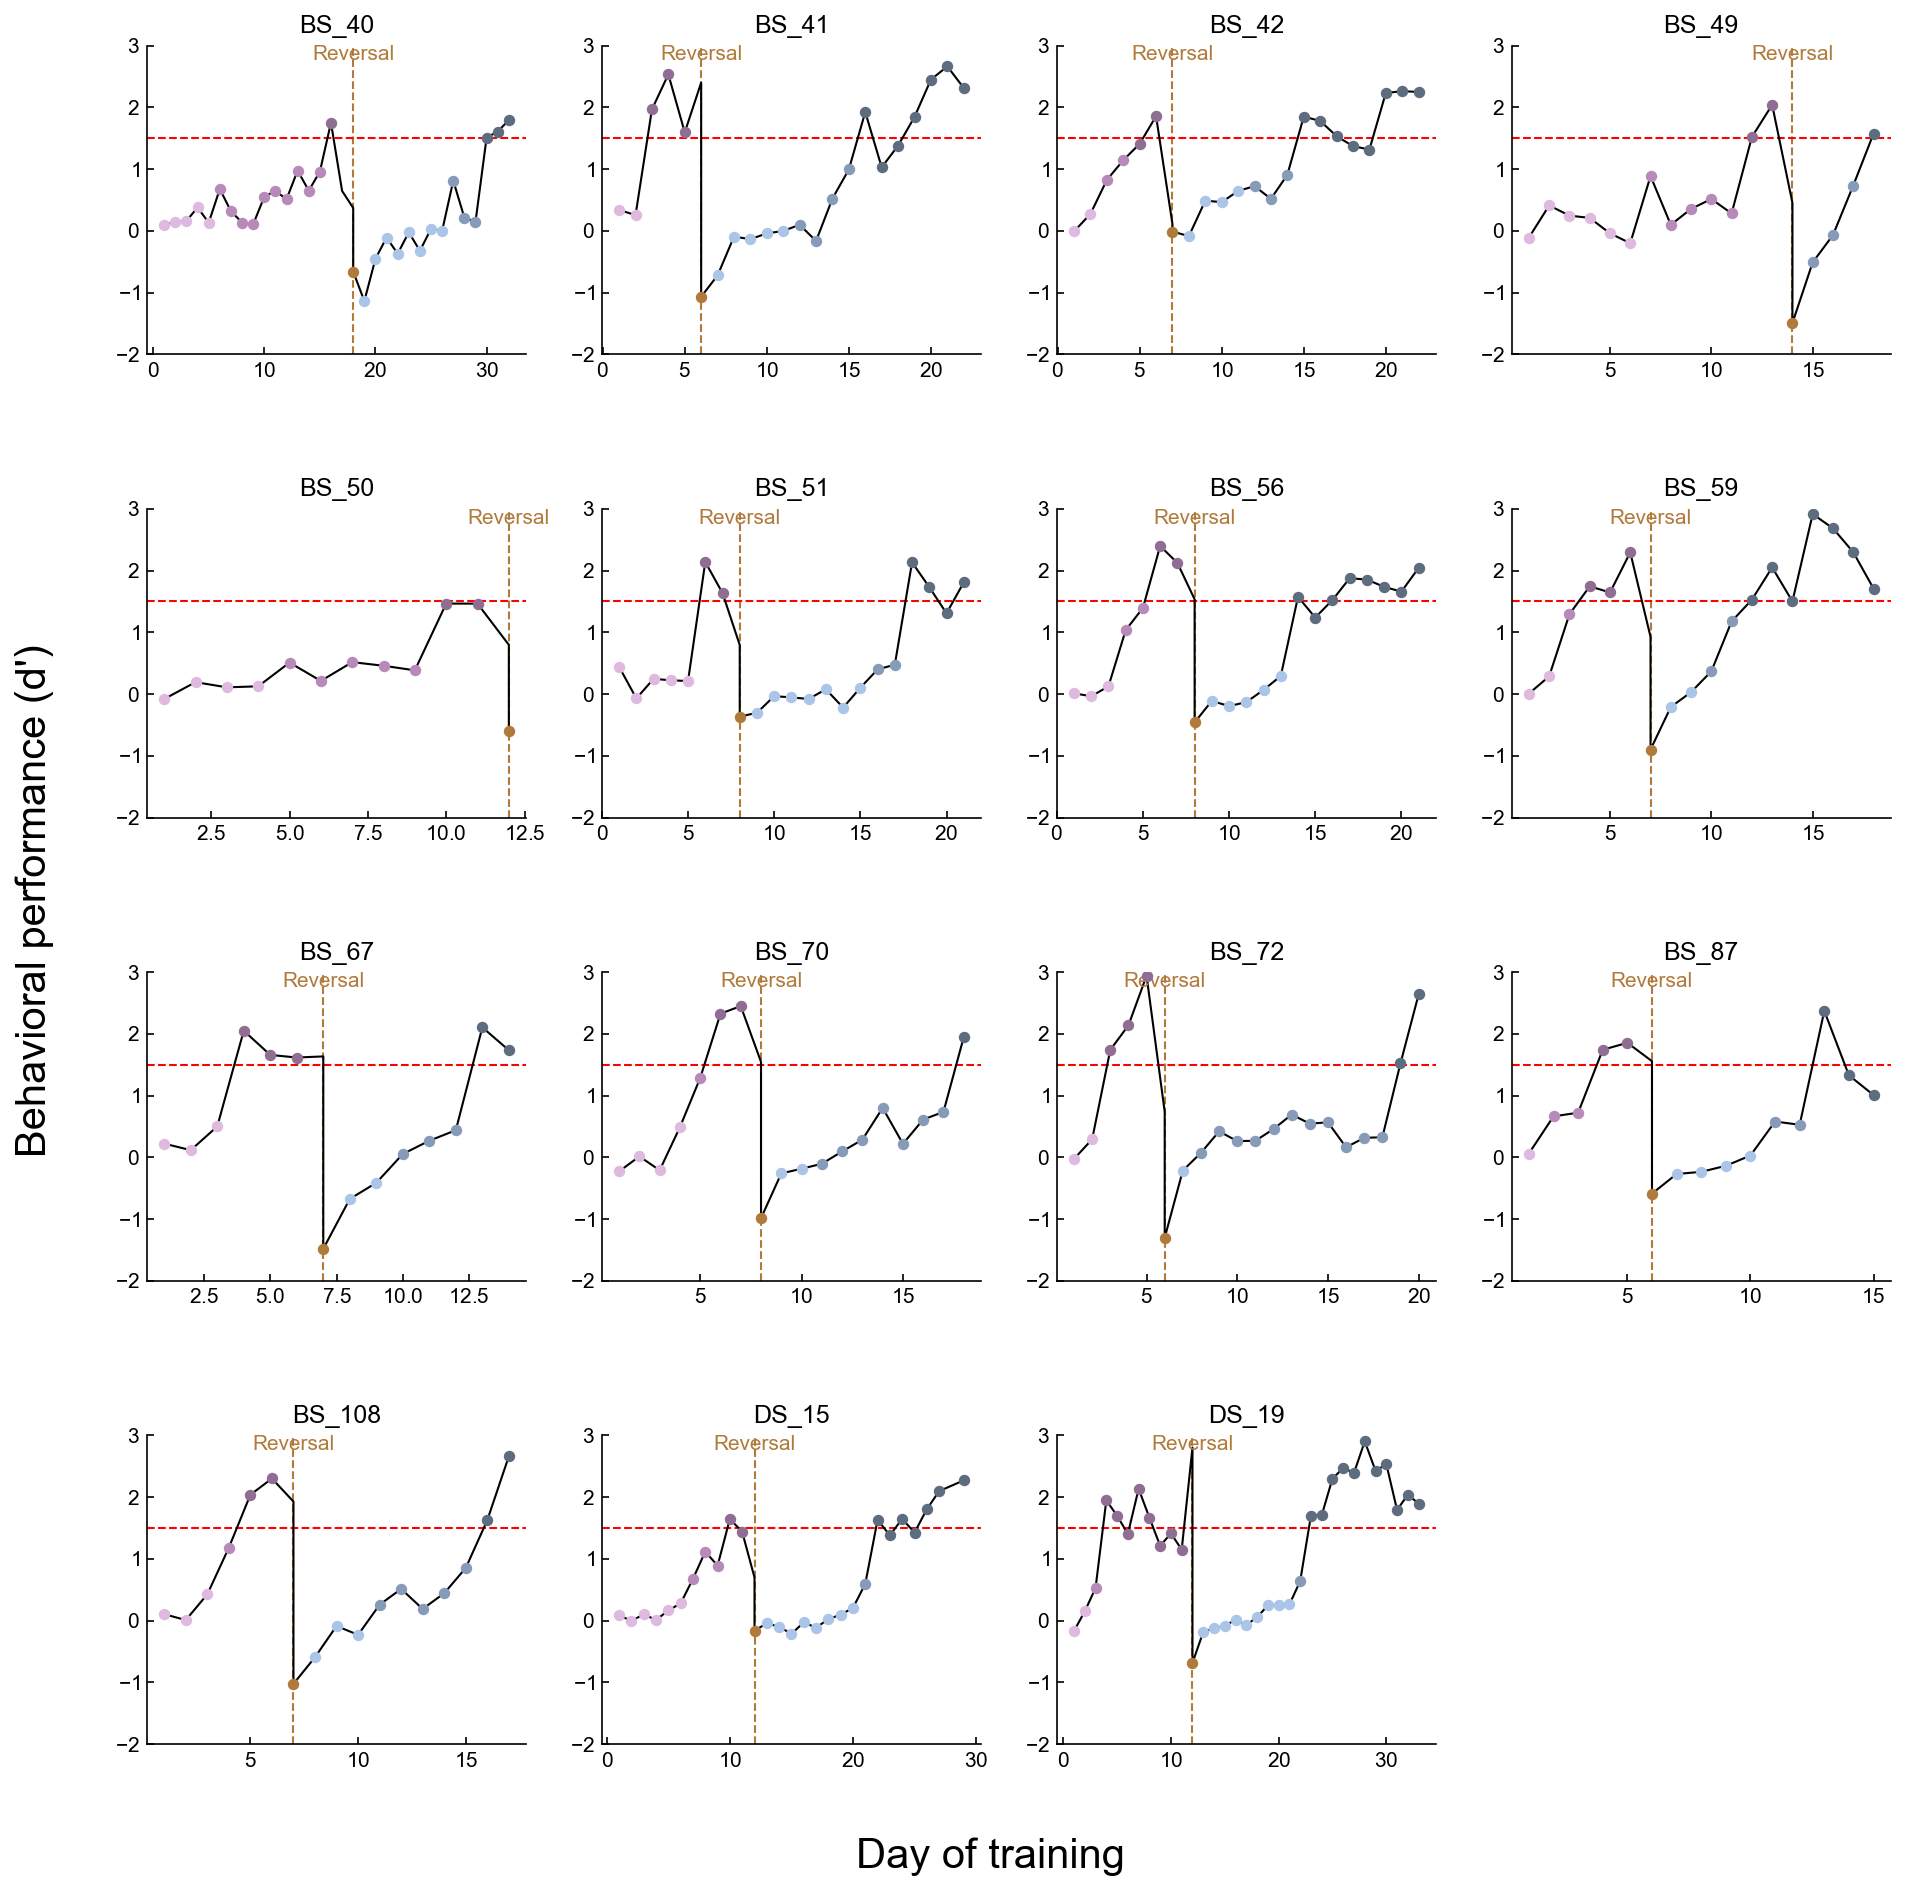

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','All ephys animals learning phases.pdf'),transparent=False,facecolor="white")

In [5]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 661/661 [00:06<00:00, 105.50it/s]


In [6]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1682/1682 [00:20<00:00, 80.75it/s] 

errors for: []


In [45]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

FRmodNorm_preearly = []
FRmodNorm_prelate = []
FRmodNorm_preexpert = []
FRmodNorm_postearly = []
FRmodNorm_postlate = []
FRmodNorm_postexpert = []

# Ramping_preearly = []
# Ramping_prelate = []
# Ramping_preexpert = []
# Ramping_postearly = []
# Ramping_postlate = []
# Ramping_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
        
    if sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
        #print('excluded')
        #continue
        pass
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    FRbaseline = sessionfile.responsiveness[clust]['all_trials'].FRbaseline
    FRmodNorm = ((FRmod-FRbaseline) / (FRmod+FRbaseline))/2+0.5
        
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(FRmod)
        FRmodNorm_preearly.append(FRmodNorm)
#         Ramping_preearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(FRmod)
        FRmodNorm_prelate.append(FRmodNorm)
#         Ramping_prelate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(FRmod)
        FRmodNorm_preexpert.append(FRmodNorm)
#         Ramping_preexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(FRmod)
        FRmodNorm_postearly.append(FRmodNorm)
#         Ramping_postearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(FRmod)
        FRmodNorm_postlate.append(FRmodNorm)
#         Ramping_postlate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(FRmod)
        FRmodNorm_postexpert.append(FRmodNorm)
#         Ramping_postexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postexpert_animals.append(sessionfile.meta.animal)

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

FRmodNorm_preearly = np.array(FRmodNorm_preearly)
FRmodNorm_prelate = np.array(FRmodNorm_prelate)
FRmodNorm_preexpert = np.array(FRmodNorm_preexpert)
FRmodNorm_postearly = np.array(FRmodNorm_postearly)
FRmodNorm_postlate = np.array(FRmodNorm_postlate)
FRmodNorm_postexpert = np.array(FRmodNorm_postexpert)

# Ramping_preearly = np.array(Ramping_preearly)
# Ramping_prelate = np.array(Ramping_prelate)
# Ramping_preexpert = np.array(Ramping_preexpert)
# Ramping_postearly = np.array(Ramping_postearly)
# Ramping_postlate = np.array(Ramping_postlate)
# Ramping_postexpert = np.array(Ramping_postexpert)

77it [00:00, 68.50it/s] <ipython-input-45-7c4f2e8d4569>:50: RuntimeWarning: invalid value encountered in double_scalars
  FRmodNorm = ((FRmod-FRbaseline) / (FRmod+FRbaseline))/2+0.5
1682it [00:20, 82.60it/s] 


Load Passive data: from TH notebook

In [46]:
animals_in_cache = []

EnumACSession = []
EnumACClust = []

for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.animal not in ['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234']:
        continue
    
    animals_in_cache.append(sessionfile.meta.animal)
    
    for clust in sessionfile.clusters.good:
        if sessionfile.meta.region == "AC":
            EnumACSession.append(session)
            EnumACClust.append(clust)
        
animals_in_cache = np.unique(animals_in_cache)

100%|██████████| 661/661 [00:05<00:00, 110.89it/s]


In [47]:
#Define 6 learning phases(days)
pre_early = 4
pre_late = 6
pre_expert = 8
post_early = 12
post_late = 15
post_expert = 16

#
FRmod_passive_preearly = []
FRmod_passive_prelate = []
FRmod_passive_preexpert = []
FRmod_passive_postearly = []
FRmod_passive_postlate = []
FRmod_passive_postexpert = []

FRmodNorm_passive_preearly = []
FRmodNorm_passive_prelate = []
FRmodNorm_passive_preexpert = []
FRmodNorm_passive_postearly = []
FRmodNorm_passive_postlate = []
FRmodNorm_passive_postexpert = []

#
preexpert_session_num = []
postlate_session_num = []
postexpert_session_num = []


In [48]:
preearly_passive_animal = []
prelate_passive_animal = []
preexpert_passive_animal = []
postearly_passive_animal = []
postlate_passive_animal = []
postexpert_passive_animal = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumACSession,EnumACClust))):
    ACsessionfile = ilep.loadSessionCached(act_directory,session)
    
    FRmod = ACsessionfile.responsiveness[clust]['all_trials'].FRmodulation
    FRbaseline = ACsessionfile.responsiveness[clust]['all_trials'].FRbaseline
    FRmodNorm = ((FRmod-FRbaseline) / (FRmod+FRbaseline))/2+0.5
    
    #1,2,3,4
    if ACsessionfile.meta.day_of_training <= pre_early:
        FRmod_passive_preearly.append(FRmod)
        FRmodNorm_passive_preearly.append(FRmodNorm)
        preearly_passive_animal.append(ACsessionfile.meta.animal)
        
        
    #5,6
    if ACsessionfile.meta.day_of_training <= pre_late and ACsessionfile.meta.day_of_training >pre_early:
        FRmod_passive_prelate.append(FRmod)
        FRmodNorm_passive_prelate.append(FRmodNorm)
        prelate_passive_animal.append(ACsessionfile.meta.animal)
    
    #7,8
    if ACsessionfile.meta.day_of_training <= pre_expert and ACsessionfile.meta.day_of_training >pre_late:
        FRmod_passive_preexpert.append(FRmod)
        FRmodNorm_passive_preexpert.append(FRmodNorm)
        preexpert_session_num.append(ACsessionfile.meta.files)
        preexpert_passive_animal.append(ACsessionfile.meta.animal)
        
    #9,10,11,12
    if ACsessionfile.meta.day_of_training <= post_early and ACsessionfile.meta.day_of_training >pre_expert:
        FRmod_passive_postearly.append(FRmod)
        FRmodNorm_passive_postearly.append(FRmodNorm)
        postearly_passive_animal.append(ACsessionfile.meta.animal)

    #13,14,15
    if ACsessionfile.meta.day_of_training <= post_late and ACsessionfile.meta.day_of_training >post_early:
        FRmod_passive_postlate.append(FRmod)
        FRmodNorm_passive_postlate.append(FRmodNorm)
        postlate_session_num.append(ACsessionfile.meta.files)
        postlate_passive_animal.append(ACsessionfile.meta.animal)
    
    #16,17,18,19,20,21
    if ACsessionfile.meta.day_of_training >= post_expert:
        FRmod_passive_postexpert.append(FRmod)
        FRmodNorm_passive_postexpert.append(FRmodNorm)
        postexpert_session_num.append(ACsessionfile.meta.files)
        postexpert_passive_animal.append(ACsessionfile.meta.animal)
    

1442it [00:09, 152.81it/s]


In [49]:
#number of animals in each learning phase

preearly_passive_animal = np.unique(preearly_passive_animal)
prelate_passive_animal = np.unique(prelate_passive_animal)
preexpert_passive_animal = np.unique(preexpert_passive_animal)
postearly_passive_animal = np.unique(postearly_passive_animal)
postlate_passive_animal = np.unique(postlate_passive_animal)
postexpert_passive_animal = np.unique(postexpert_passive_animal)

preearly_passive_animal_num = len(preearly_passive_animal)
prelate_passive_animal_num = len(prelate_passive_animal)
preexpert_passive_animal_num = len(preexpert_passive_animal)
postearly_passive_animal_num = len(postearly_passive_animal)
postlate_passive_animal_num = len(postlate_passive_animal)
postexpert_passive_animal_num = len(postexpert_passive_animal)

In [50]:
FRmod_passive_preearly = np.array(FRmod_passive_preearly)
FRmod_passive_prelate = np.array(FRmod_passive_prelate)
FRmod_passive_preexpert = np.array(FRmod_passive_preexpert)
FRmod_passive_postearly = np.array(FRmod_passive_postearly)
FRmod_passive_postlate = np.array(FRmod_passive_postlate)
FRmod_passive_postexpert = np.array(FRmod_passive_postexpert)

FRmodNorm_passive_preearly = np.array(FRmodNorm_passive_preearly)
FRmodNorm_passive_prelate = np.array(FRmodNorm_passive_prelate)
FRmodNorm_passive_preexpert = np.array(FRmodNorm_passive_preexpert)
FRmodNorm_passive_postearly = np.array(FRmodNorm_passive_postearly)
FRmodNorm_passive_postlate = np.array(FRmodNorm_passive_postlate)
FRmodNorm_passive_postexpert = np.array(FRmodNorm_passive_postexpert)

<ipython-input-18-34e00de89d74>:18: RuntimeWarning: divide by zero encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
<ipython-input-18-34e00de89d74>:18: RuntimeWarning: invalid value encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
<ipython-input-18-34e00de89d74>:61: RuntimeWarning: invalid value encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(passive_data)),width=0.25)


#E2CAE3
#C27AC5
#764979
#B9D3F7
#5181C2
#3C557A
0.03829063235489019
0.024122367556744254
0.4020806142571882
0.7961783097823942
7.601829845219212e-09
2.2636811121993523e-06
0.008333333333333333


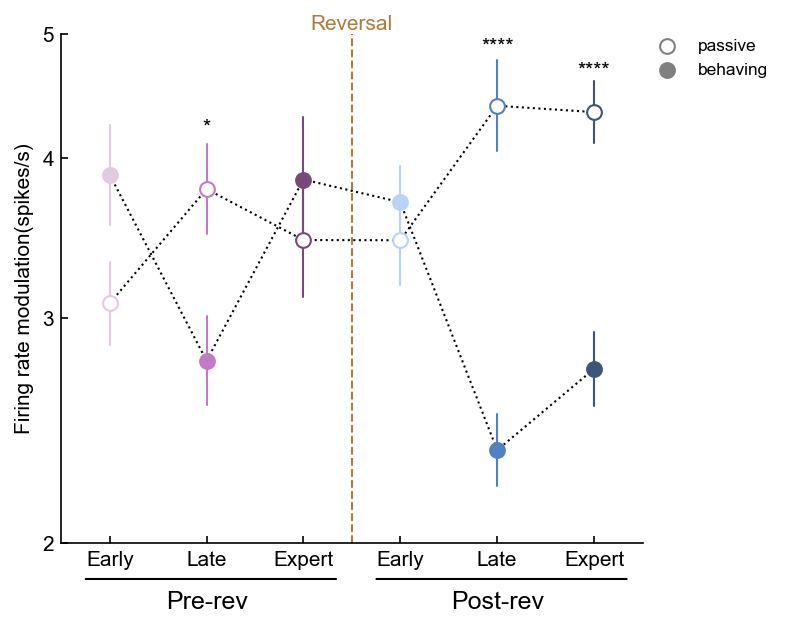

In [18]:
#Firing rate modulation graphs

size=5

FRmod_baseline_median = 3.4986225895316823#np.median(FRmod_preearly)
labels = ['Early','Late','Expert','Early','Late','Expert']
offset_distance = 0#0.05

fig, ax = plt.subplots(figsize=(5,4.5)) #5/3 with height of 4.5

data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
data = [np.log10(ilep.rmnan(d,positiveOnly=True)) for d in data]
#num_animals = [preearly_animals_num,prelate_animals_num,preexpert_animals_num,postearly_animals_num,postlate_animals_num,postexpert_animals_num]
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

#ax.scatter(X-0.125, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    eye_color = PHASE_COLORS[idx]
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    
    #eye_color='k'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,5,6)-offset_distance,medians,color='k',linestyle=':',lw=1)
    
######################################################################################################################################################
passive_data = [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
passive_data = [np.log10(d) for d in passive_data]
#num_passive_animal = [preearly_passive_animal_num,prelate_passive_animal_num,preexpert_passive_animal_num,postearly_passive_animal_num,postlate_passive_animal_num,postexpert_passive_animal_num]
X = [np.ones(len(l))*idx for idx,l in enumerate(passive_data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(passive_data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(passive_data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

#ax.scatter(X+0.125, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10,marker='s')
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(passive_data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    eye_color=PHASE_COLORS[idx]
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    print(border_color)
    
    eye_color='white'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx+offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx+offset_distance, idx+offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,5,6)+offset_distance,medians,color='k',linestyle=':',lw=1)
    


ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
#
#ax.set_ylim([0.1,100])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation(spikes/s)')
#ax.set_ylim([2,10])
#ax.set_yticks([2,4,6,8,10])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

#numbers
#cells
#for idx,(column1,column2) in enumerate(zip(data,passive_data)):
#    #ax.text(idx,120,str(len(column1))+'/'+str(len(column2)),fontsize=8)
#    ax.text(idx,12,str(len(column1))+'/'+str(len(column2)),fontsize=6)
##animals
#for idx,(column1,column2) in enumerate(zip(num_animals,num_passive_animal)):
#    #ax.text(idx,95,str(column1)+'/'+str(column2),fontsize=8)
#    ax.text(idx,11.75,str(column1)+'/'+str(column2),fontsize=6)
    
#ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
#ax.axhline(FRmod_baseline_median,color='k',linestyle='--',lw=1,zorder=-4)

ax.scatter([],[],ec='grey',fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='passive')
ax.scatter([],[],ec='grey',fc='grey',s=summary_size,lw=summary_width,zorder=10,marker='o',label='behaving')
lgd = ax.legend(frameon=False,loc=(1,0.9))

for idx,(column1,column2) in enumerate(zip(data,passive_data)):
    pval = mannwhitneyu(column1,column2).pvalue
    print(pval)
    
#statistics
print(0.05/6)
ax.text(1,np.log10(4.15),str('*'),verticalalignment='bottom',horizontalalignment='center')
ax.text(4,np.log10(4.8),str('****'),verticalalignment='bottom',horizontalalignment='center')
ax.text(5,np.log10(4.6),str('****'),verticalalignment='bottom',horizontalalignment='center')

#ax.text(-0.4,9.5,'CR',color=CR_COLOR,horizontalalignment='left',verticalalignment='top')
#ax.text(-0.4,0.5,'NCR',color=NCR_COLOR,horizontalalignment='left',verticalalignment='bottom')

#ax.set_yscale('log',subs=[])
#ax.set_ylim([2,10])
ax.set_yticks(np.log10([2,3,4,5]))
ax.set_yticklabels([2,3,4,5])
ax.set_ylim([np.log10(2),np.log10(5)])


xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
t1 = ax.text(xtick_pos_pre, 0.2512924161898314+0.0125, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, 0.2512924161898314+0.0125, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.035, -0.07), xycoords='axes fraction', xytext=(0.48, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.98, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.03, -0.095), xycoords='axes fraction', xytext=(0.48, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -0.095), xycoords='axes fraction', xytext=(0.98, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

#ax.fill_between([2.5,5.5],[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color=SWITCH_COLOR,alpha=0.2,lw=0)
#fig.savefig(os.path.join('D:\\\\TempFigures','Task Encoder drafts','Task encoders schematic draft 1.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig(os.path.join('D:\\Figures','Tuning Figures','Behavior vs Passive FRmodulation over learning.pdf'),transparent=False,facecolor="white")
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of log of FRmodulation over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')

In [19]:
### Create dataframe ###
phase = len(FRmod_passive_preearly)*["pre-early"] + len(FRmod_preearly)*["pre-early"] \
    + len(FRmod_passive_prelate)*["pre-late"] + len(FRmod_prelate)*["pre-late"] \
    + len(FRmod_passive_preexpert)*["pre-expert"] + len(FRmod_preexpert)*["pre-expert"] \
    + len(FRmod_passive_postearly)*["post-early"] + len(FRmod_postearly)*["post-early"] \
    + len(FRmod_passive_postlate)*["post-late"] + len(FRmod_postlate)*["post-late"] \
    + len(FRmod_passive_postexpert)*["post-expert"] + len(FRmod_postexpert)*["post-expert"]

context = len(FRmod_passive_preearly)*["passive"] + len(FRmod_preearly)*["active"] \
    + len(FRmod_passive_prelate)*["passive"] + len(FRmod_prelate)*["active"] \
    + len(FRmod_passive_preexpert)*["passive"] + len(FRmod_preexpert)*["active"] \
    + len(FRmod_passive_postearly)*["passive"] + len(FRmod_postearly)*["active"] \
    + len(FRmod_passive_postlate)*["passive"] + len(FRmod_postlate)*["active"] \
    + len(FRmod_passive_postexpert)*["passive"] + len(FRmod_postexpert)*["active"]

mod = (np.concatenate([FRmod_passive_preearly, FRmod_preearly,
    FRmod_passive_prelate, FRmod_prelate,
    FRmod_passive_preexpert, FRmod_preexpert,
    FRmod_passive_postearly, FRmod_postearly,
    FRmod_passive_postlate, FRmod_postlate,
    FRmod_passive_postexpert, FRmod_postexpert]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})



### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
#print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])
pairwise_mwu

            Source             SS      DF           MS          F     p-unc  \
0            phase     638.835563     5.0   127.767113   1.077468  0.370721   
1          context    2071.540126     1.0  2071.540126  17.469421  0.000030   
2  phase * context    4020.179428     5.0   804.035886   6.780482  0.000003   
3         Residual  325386.064577  2744.0   118.580927        NaN       NaN   

        np2  
0  0.001959  
1  0.006326  
2  0.012204  
3       NaN  



,Contrast,phase,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,phase,-,post-early,post-expert,False,False,176727.5,two-sided,7.644095e-01,8.190102e-01,fdr_bh,-0.014344
1,phase,-,post-early,post-late,False,False,141670.0,two-sided,1.788860e-02,1.341645e-01,fdr_bh,0.094863
2,phase,-,post-early,pre-early,False,False,106241.5,two-sided,3.539698e-01,5.709191e-01,fdr_bh,0.083379
3,phase,-,post-early,pre-expert,False,False,59747.0,two-sided,9.303624e-01,9.303624e-01,fdr_bh,-0.012092
4,phase,-,post-early,pre-late,False,False,117167.0,two-sided,2.175337e-01,4.661437e-01,fdr_bh,0.035035
5,phase,-,post-expert,post-late,False,False,187795.5,two-sided,3.852372e-03,5.778558e-02,fdr_bh,0.111580
6,phase,-,post-expert,pre-early,False,False,140500.0,two-sided,2.149732e-01,4.661437e-01,fdr_bh,0.100169
7,phase,-,post-expert,pre-expert,False,False,79223.0,two-sided,7.174495e-01,8.190102e-01,fdr_bh,0.001011
8,phase,-,post-expert,pre-late,False,False,155030.5,two-sided,1.112581e-01,4.172177e-01,fdr_bh,0.050518
9,phase,-,post-late,pre-early,False,False,93041.0,two-sided,1.734195e-01,4.661437e-01,fdr_bh,-0.016505


<ipython-input-58-ad3f7b36e1d2>:18: RuntimeWarning: divide by zero encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
<ipython-input-58-ad3f7b36e1d2>:18: RuntimeWarning: invalid value encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
<ipython-input-58-ad3f7b36e1d2>:62: RuntimeWarning: invalid value encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(passive_data)),width=0.25)


#969696
#969696
#969696
#969696
#969696
#969696
0.03829063235489019
0.024122367556744254
0.4020806142571882
0.7961783097823942
7.601829845219212e-09
2.2636811121993523e-06
0.008333333333333333


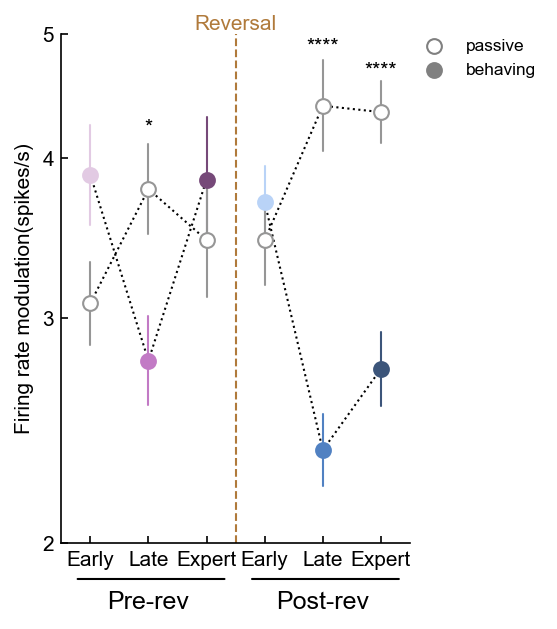

In [58]:
#Firing rate modulation graphs

size=5

FRmod_baseline_median = 3.4986225895316823#np.median(FRmod_preearly)
labels = ['Early','Late','Expert','Early','Late','Expert']
offset_distance = 0#0.05

fig, ax = plt.subplots(figsize=(3,4.5)) #5/3 with height of 4.5

data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
data = [np.log10(ilep.rmnan(d,positiveOnly=True)) for d in data]
#num_animals = [preearly_animals_num,prelate_animals_num,preexpert_animals_num,postearly_animals_num,postlate_animals_num,postexpert_animals_num]
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

#ax.scatter(X-0.125, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    eye_color = PHASE_COLORS[idx]
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    
    #eye_color='k'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    
######################################################################################################################################################
passive_data = [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
passive_data = [np.log10(d) for d in passive_data]
#num_passive_animal = [preearly_passive_animal_num,prelate_passive_animal_num,preexpert_passive_animal_num,postearly_passive_animal_num,postlate_passive_animal_num,postexpert_passive_animal_num]
X = [np.ones(len(l))*idx for idx,l in enumerate(passive_data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(passive_data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(passive_data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

#ax.scatter(X+0.125, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10,marker='s')
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(passive_data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    #eye_color=PHASE_COLORS[idx]
    eye_color=GOOD_GREY
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    print(border_color)
    
    eye_color='white'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx+offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx+offset_distance, idx+offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    


ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
#
#ax.set_ylim([0.1,100])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation(spikes/s)')
#ax.set_ylim([2,10])
#ax.set_yticks([2,4,6,8,10])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

#numbers
#cells
#for idx,(column1,column2) in enumerate(zip(data,passive_data)):
#    #ax.text(idx,120,str(len(column1))+'/'+str(len(column2)),fontsize=8)
#    ax.text(idx,12,str(len(column1))+'/'+str(len(column2)),fontsize=6)
##animals
#for idx,(column1,column2) in enumerate(zip(num_animals,num_passive_animal)):
#    #ax.text(idx,95,str(column1)+'/'+str(column2),fontsize=8)
#    ax.text(idx,11.75,str(column1)+'/'+str(column2),fontsize=6)
    
#ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
#ax.axhline(FRmod_baseline_median,color='k',linestyle='--',lw=1,zorder=-4)

ax.scatter([],[],ec='grey',fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='passive')
ax.scatter([],[],ec='grey',fc='grey',s=summary_size,lw=summary_width,zorder=10,marker='o',label='behaving')
lgd = ax.legend(frameon=False,loc=(1,0.9))

for idx,(column1,column2) in enumerate(zip(data,passive_data)):
    pval = mannwhitneyu(column1,column2).pvalue
    print(pval)
    
#statistics
print(0.05/6)
ax.text(1,np.log10(4.15),str('*'),verticalalignment='bottom',horizontalalignment='center')
ax.text(4,np.log10(4.8),str('****'),verticalalignment='bottom',horizontalalignment='center')
ax.text(5,np.log10(4.6),str('****'),verticalalignment='bottom',horizontalalignment='center')

#ax.text(-0.4,9.5,'CR',color=CR_COLOR,horizontalalignment='left',verticalalignment='top')
#ax.text(-0.4,0.5,'NCR',color=NCR_COLOR,horizontalalignment='left',verticalalignment='bottom')

#ax.set_yscale('log',subs=[])
#ax.set_ylim([2,10])
ax.set_yticks(np.log10([2,3,4,5]))
ax.set_yticklabels([2,3,4,5])
ax.set_ylim([np.log10(2),np.log10(5)])


xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
t1 = ax.text(xtick_pos_pre, 0.2512924161898314+0.0125, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, 0.2512924161898314+0.0125, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.035, -0.07), xycoords='axes fraction', xytext=(0.48, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.98, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.03, -0.095), xycoords='axes fraction', xytext=(0.48, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -0.095), xycoords='axes fraction', xytext=(0.98, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

#ax.fill_between([2.5,5.5],[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color=SWITCH_COLOR,alpha=0.2,lw=0)
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of log of FRmodulation over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')

In [44]:
FRmodNorm_prelate

array([-0.05555556, -0.27272727, -0.6375    , -0.50539653, -0.7347561 ,
       -0.50141643, -0.06976744, -0.3968254 ,  0.28760529, -0.49377593,
       -0.30742049, -0.59164733, -0.07118644, -0.40909091, -0.78106509,
       -0.63671128, -0.68980477,  0.5030303 , -0.27160494, -0.25203252,
       -0.14285714, -0.4086629 , -0.48186528, -0.23076923, -0.12      ,
       -0.37704918, -0.10798122, -0.31547619,  0.84351554,  0.1679198 ,
        0.68935428,  0.58518519,  0.2173913 ,  0.68      ,  0.56935818,
        0.69801463, -0.04979253,  0.33678756,  0.64732143,  0.72195893,
       -0.65562914,  0.73913043, -0.1984127 , -0.18779343,  0.28888889,
        0.31623932,  0.84541063,  0.76091954, -0.55555556, -0.37297297,
       -0.46816479, -0.06666667, -0.40664962,  0.43262411, -0.17647059,
       -0.22641509,  0.1840796 ,  0.14171657,  0.1047619 ,  0.10447761,
        0.33752621, -0.02185792, -0.61528662,  0.35207497,  0.39516129,
        0.37984496,  0.42241379, -0.15384615,  0.27777778,  0.52

# Normalized

#969696
#969696
#969696
#969696
#969696
#969696
0.9379061182225326
2.471178955559442e-06
0.36516107738804404
0.5710363451694345
1.156300260687851e-11
1.9562377456684817e-17
0.008333333333333333


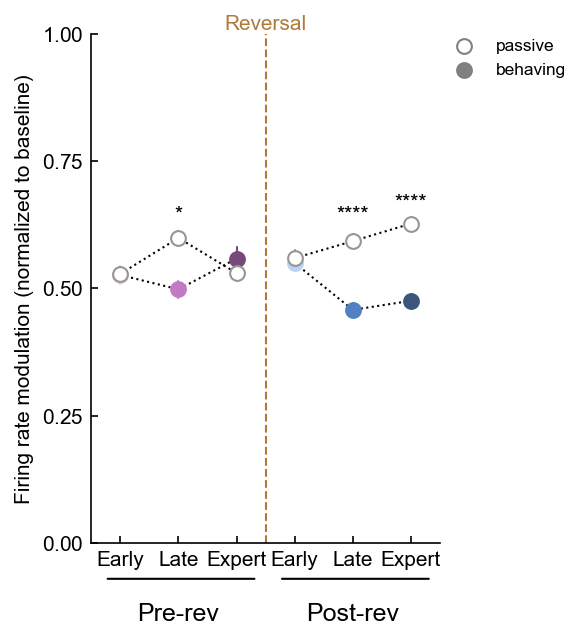

In [82]:
#Firing rate modulation graphs

size=5

FRmod_baseline_median = 3.4986225895316823#np.median(FRmod_preearly)
labels = ['Early','Late','Expert','Early','Late','Expert']
offset_distance = 0#0.05

fig, ax = plt.subplots(figsize=(3,4.5)) #5/3 with height of 4.5

data = [FRmodNorm_preearly,FRmodNorm_prelate,FRmodNorm_preexpert,FRmodNorm_postearly,FRmodNorm_postlate,FRmodNorm_postexpert]
data = [ilep.rmnan(d) for d in data]
#data = [np.log10(ilep.rmnan(d,positiveOnly=True)) for d in data]
numCon = len(data)
colors = NCR_CR_cmap((Y-1)/5)

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    eye_color = PHASE_COLORS[idx]
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    
    #eye_color='k'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    
######################################################################################################################################################
passive_data = [FRmodNorm_passive_preearly,FRmodNorm_passive_prelate,FRmodNorm_passive_preexpert,FRmodNorm_passive_postearly,FRmodNorm_passive_postlate,FRmodNorm_passive_postexpert]
# passive_data = [np.log10(d) for d in passive_data]
#num_passive_animal = [preearly_passive_animal_num,prelate_passive_animal_num,preexpert_passive_animal_num,postearly_passive_animal_num,postlate_passive_animal_num,postexpert_passive_animal_num]

#Plot summary
for idx,column in enumerate(passive_data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    #eye_color=PHASE_COLORS[idx]
    eye_color=GOOD_GREY
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    print(border_color)
    
    eye_color='white'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx+offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx+offset_distance, idx+offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    


ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
#
#ax.set_ylim([0.1,100])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation (normalized to baseline)')
#ax.set_ylim([2,10])
#ax.set_yticks([2,4,6,8,10])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

#numbers
#cells
#for idx,(column1,column2) in enumerate(zip(data,passive_data)):
#    #ax.text(idx,120,str(len(column1))+'/'+str(len(column2)),fontsize=8)
#    ax.text(idx,12,str(len(column1))+'/'+str(len(column2)),fontsize=6)
##animals
#for idx,(column1,column2) in enumerate(zip(num_animals,num_passive_animal)):
#    #ax.text(idx,95,str(column1)+'/'+str(column2),fontsize=8)
#    ax.text(idx,11.75,str(column1)+'/'+str(column2),fontsize=6)
    
#ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
#ax.axhline(FRmod_baseline_median,color='k',linestyle='--',lw=1,zorder=-4)

ax.scatter([],[],ec='grey',fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='passive')
ax.scatter([],[],ec='grey',fc='grey',s=summary_size,lw=summary_width,zorder=10,marker='o',label='behaving')
lgd = ax.legend(frameon=False,loc=(1,0.9))

for idx,(column1,column2) in enumerate(zip(data,passive_data)):
    pval = mannwhitneyu(column1,column2).pvalue
    print(pval)
    
#statistics
print(0.05/6)
# ax.text(1,np.log10(4.15),str('*'),verticalalignment='bottom',horizontalalignment='center')
# ax.text(4,np.log10(4.8),str('****'),verticalalignment='bottom',horizontalalignment='center')
# ax.text(5,np.log10(4.6),str('****'),verticalalignment='bottom',horizontalalignment='center')
ax.text(1,0.625,str('*'),verticalalignment='bottom',horizontalalignment='center')
ax.text(4,0.625,str('****'),verticalalignment='bottom',horizontalalignment='center')
ax.text(5,0.65,str('****'),verticalalignment='bottom',horizontalalignment='center')

#ax.text(-0.4,9.5,'CR',color=CR_COLOR,horizontalalignment='left',verticalalignment='top')
#ax.text(-0.4,0.5,'NCR',color=NCR_COLOR,horizontalalignment='left',verticalalignment='bottom')

#ax.set_yscale('log',subs=[])
#ax.set_ylim([2,10])
# ax.set_yticks(np.log10([2,3,4,5]))
# ax.set_yticklabels([2,3,4,5])
# ax.set_ylim([np.log10(2),np.log10(5)])
ax.set_ylim([0,1])
ax.set_yticks([0,0.25,0.5,0.75,1])
#ax.set_yticklabels([2,3,4,5])

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.0075
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.035, -0.07), xycoords='axes fraction', xytext=(0.48, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.98, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.03, -0.095), xycoords='axes fraction', xytext=(0.48, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -0.095), xycoords='axes fraction', xytext=(0.98, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

#ax.fill_between([2.5,5.5],[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color=SWITCH_COLOR,alpha=0.2,lw=0)
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Normalized AC Mean of log of FRmodulation over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')

In [97]:
np.mean(FRmod_preexpert)

7.041143614699935

In [99]:
np.mean(FRmod_passive_preexpert)

7.778718712798558

# Normalized to sum

#969696
#969696
#969696
#969696
#969696
#969696
0.03829063235489019
0.024122367556744254
0.4854895096777033
0.7961783097823942
7.601829845219212e-09
2.2636811121993523e-06
0.008333333333333333


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


Text(2.5, 1.5149128684762352, 'Reversal')

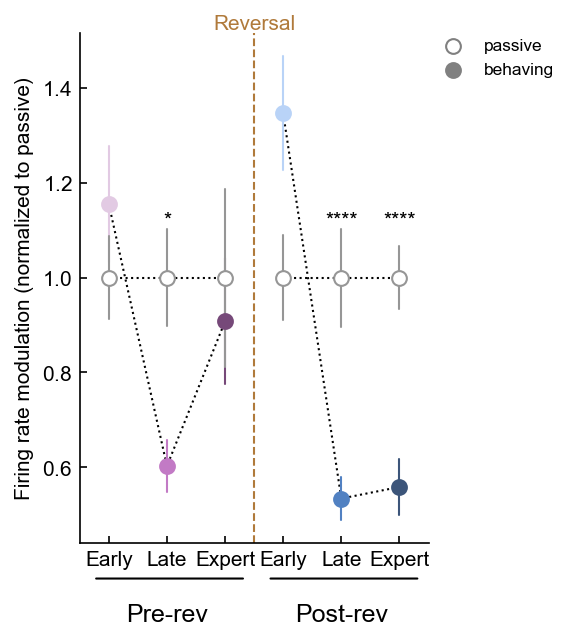

In [106]:
#Firing rate modulation graphs

size=5

FRmod_baseline_median = 3.4986225895316823#np.median(FRmod_preearly)
labels = ['Early','Late','Expert','Early','Late','Expert']
offset_distance = 0#0.05

fig, ax = plt.subplots(figsize=(3,4.5)) #5/3 with height of 4.5

raw_data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
raw_data = [ilep.rmnan(d) for d in raw_data]
raw_passive_data = [FRmod_passive_preearly,FRmod_passive_prelate,FRmod_passive_preexpert,FRmod_passive_postearly,FRmod_passive_postlate,FRmod_passive_postexpert]
raw_passive_data = [ilep.rmnan(d) for d in raw_passive_data]
numCon = len(raw_data)



#Normalize
data = np.copy(raw_data)
passive_data = np.copy(raw_passive_data)

# data = [(d-np.mean(raw_passive_data[idx]))/(np.mean(raw_data[idx])+np.mean(raw_passive_data[idx])) for idx,d in enumerate(data)]
# passive_data = [(d-np.mean(raw_data[idx]))/(np.mean(raw_data[idx])+np.mean(raw_passive_data[idx])) for idx,d in enumerate(passive_data)]
# data = [(d)/(np.mean(raw_data[idx])+np.mean(raw_passive_data[idx])) for idx,d in enumerate(data)]
# passive_data = [(d)/(np.mean(raw_data[idx])+np.mean(raw_passive_data[idx])) for idx,d in enumerate(passive_data)]
data = [(d)/(np.mean(raw_passive_data[idx])) for idx,d in enumerate(data)]
passive_data = [(d)/(np.mean(raw_passive_data[idx])) for idx,d in enumerate(passive_data)]

#print(passive_data)


#colors = NCR_CR_cmap((Y-1)/5)

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    eye_color = PHASE_COLORS[idx]
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    
    #eye_color='k'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    
######################################################################################################################################################
#Plot summary
for idx,column in enumerate(passive_data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    #eye_color=PHASE_COLORS[idx]
    eye_color=GOOD_GREY
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    print(border_color)
    
    eye_color='white'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx+offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx+offset_distance, idx+offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    


ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
#
#ax.set_ylim([0.1,100])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation (normalized to passive)')
#ax.set_ylim([2,10])
#ax.set_yticks([2,4,6,8,10])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

#numbers
#cells
#for idx,(column1,column2) in enumerate(zip(data,passive_data)):
#    #ax.text(idx,120,str(len(column1))+'/'+str(len(column2)),fontsize=8)
#    ax.text(idx,12,str(len(column1))+'/'+str(len(column2)),fontsize=6)
##animals
#for idx,(column1,column2) in enumerate(zip(num_animals,num_passive_animal)):
#    #ax.text(idx,95,str(column1)+'/'+str(column2),fontsize=8)
#    ax.text(idx,11.75,str(column1)+'/'+str(column2),fontsize=6)
    
#ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
#ax.axhline(FRmod_baseline_median,color='k',linestyle='--',lw=1,zorder=-4)

ax.scatter([],[],ec='grey',fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='passive')
ax.scatter([],[],ec='grey',fc='grey',s=summary_size,lw=summary_width,zorder=10,marker='o',label='behaving')
lgd = ax.legend(frameon=False,loc=(1,0.9))

for idx,(column1,column2) in enumerate(zip(data,passive_data)):
    pval = mannwhitneyu(column1,column2).pvalue
    print(pval)
    
#statistics
print(0.05/6)
# ax.text(1,np.log10(4.15),str('*'),verticalalignment='bottom',horizontalalignment='center')
# ax.text(4,np.log10(4.8),str('****'),verticalalignment='bottom',horizontalalignment='center')
# ax.text(5,np.log10(4.6),str('****'),verticalalignment='bottom',horizontalalignment='center')
ax.text(1,1.1,str('*'),verticalalignment='bottom',horizontalalignment='center')
ax.text(4,1.1,str('****'),verticalalignment='bottom',horizontalalignment='center')
ax.text(5,1.1,str('****'),verticalalignment='bottom',horizontalalignment='center')

#ax.text(-0.4,9.5,'CR',color=CR_COLOR,horizontalalignment='left',verticalalignment='top')
#ax.text(-0.4,0.5,'NCR',color=NCR_COLOR,horizontalalignment='left',verticalalignment='bottom')

#ax.set_yscale('log',subs=[])
#ax.set_ylim([2,10])
# ax.set_yticks(np.log10([2,3,4,5]))
# ax.set_yticklabels([2,3,4,5])
# ax.set_ylim([np.log10(2),np.log10(5)])
# ax.set_ylim([0,1])
# ax.set_yticks([0,0.25,0.5,0.75,1])
# ax.set_yticklabels([2,3,4,5])

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.0075
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.035, -0.07), xycoords='axes fraction', xytext=(0.48, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.98, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.03, -0.095), xycoords='axes fraction', xytext=(0.48, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -0.095), xycoords='axes fraction', xytext=(0.98, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

#ax.fill_between([2.5,5.5],[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color=SWITCH_COLOR,alpha=0.2,lw=0)
#fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Normalized AC Mean of log of FRmodulation over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')

#969696
#969696
#969696
#969696
#969696
#969696
4.707744749774051e-60
6.0920001621054474e-58
8.908275825259158e-37
6.802026465420009e-75
8.189932193801898e-64
1.5768306331159822e-80
0.008333333333333333


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


Text(2.5, 1.0588553469121609, 'Reversal')

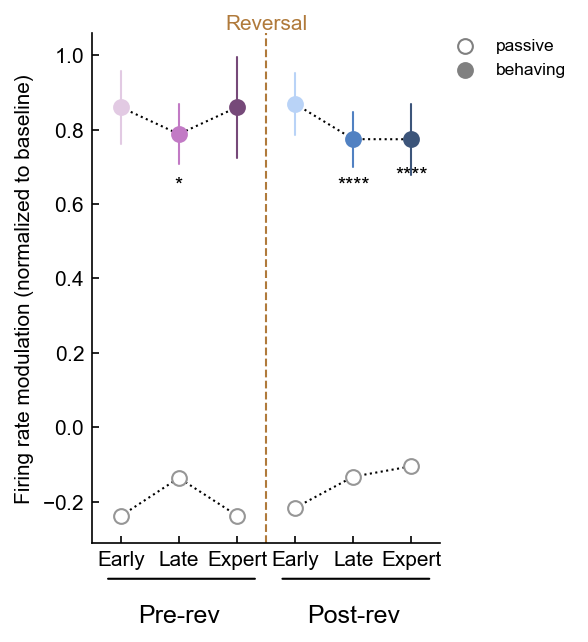

In [86]:
#Firing rate modulation graphs

size=5

FRmod_baseline_median = 3.4986225895316823#np.median(FRmod_preearly)
labels = ['Early','Late','Expert','Early','Late','Expert']
offset_distance = 0#0.05

fig, ax = plt.subplots(figsize=(3,4.5)) #5/3 with height of 4.5

raw_data = [FRmod_preearly,FRmod_prelate,FRmod_preexpert,FRmod_postearly,FRmod_postlate,FRmod_postexpert]
raw_data = [ilep.rmnan(d) for d in raw_data]
raw_passive_data = [FRmodNorm_passive_preearly,FRmodNorm_passive_prelate,FRmodNorm_passive_preexpert,FRmodNorm_passive_postearly,FRmodNorm_passive_postlate,FRmodNorm_passive_postexpert]
raw_passive_data = [ilep.rmnan(d) for d in raw_passive_data]
numCon = len(raw_data)



#Normalize
data = np.copy(raw_data)
passive_data = np.copy(raw_passive_data)

data = [(d-np.mean(passive_data[idx]))/(np.mean(data[idx])+np.mean(passive_data[idx])) for idx,d in enumerate(data)]
passive_data = [(d-np.mean(data[idx]))/(np.mean(data[idx])+np.mean(passive_data[idx])) for idx,d in enumerate(passive_data)]

#print(passive_data)


#colors = NCR_CR_cmap((Y-1)/5)

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    eye_color = PHASE_COLORS[idx]
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    
    #eye_color='k'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    
######################################################################################################################################################
#Plot summary
for idx,column in enumerate(passive_data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    #eye_color=PHASE_COLORS[idx]
    eye_color=GOOD_GREY
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    print(border_color)
    
    eye_color='white'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx+offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='o')
    ax.plot([idx+offset_distance, idx+offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx+offset_distance-0.05, idx+offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)+offset_distance,medians[0:3],color='k',linestyle=':',lw=1)
plt.plot(np.linspace(3,5,3)+offset_distance,medians[3:6],color='k',linestyle=':',lw=1)
    


ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
#
#ax.set_ylim([0.1,100])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation (normalized to baseline)')
#ax.set_ylim([2,10])
#ax.set_yticks([2,4,6,8,10])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

#numbers
#cells
#for idx,(column1,column2) in enumerate(zip(data,passive_data)):
#    #ax.text(idx,120,str(len(column1))+'/'+str(len(column2)),fontsize=8)
#    ax.text(idx,12,str(len(column1))+'/'+str(len(column2)),fontsize=6)
##animals
#for idx,(column1,column2) in enumerate(zip(num_animals,num_passive_animal)):
#    #ax.text(idx,95,str(column1)+'/'+str(column2),fontsize=8)
#    ax.text(idx,11.75,str(column1)+'/'+str(column2),fontsize=6)
    
#ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)
#ax.axhline(FRmod_baseline_median,color='k',linestyle='--',lw=1,zorder=-4)

ax.scatter([],[],ec='grey',fc='white',s=summary_size,lw=summary_width,zorder=10,marker='o',label='passive')
ax.scatter([],[],ec='grey',fc='grey',s=summary_size,lw=summary_width,zorder=10,marker='o',label='behaving')
lgd = ax.legend(frameon=False,loc=(1,0.9))

for idx,(column1,column2) in enumerate(zip(data,passive_data)):
    pval = mannwhitneyu(column1,column2).pvalue
    print(pval)
    
#statistics
print(0.05/6)
# ax.text(1,np.log10(4.15),str('*'),verticalalignment='bottom',horizontalalignment='center')
# ax.text(4,np.log10(4.8),str('****'),verticalalignment='bottom',horizontalalignment='center')
# ax.text(5,np.log10(4.6),str('****'),verticalalignment='bottom',horizontalalignment='center')
ax.text(1,0.625,str('*'),verticalalignment='bottom',horizontalalignment='center')
ax.text(4,0.625,str('****'),verticalalignment='bottom',horizontalalignment='center')
ax.text(5,0.65,str('****'),verticalalignment='bottom',horizontalalignment='center')

#ax.text(-0.4,9.5,'CR',color=CR_COLOR,horizontalalignment='left',verticalalignment='top')
#ax.text(-0.4,0.5,'NCR',color=NCR_COLOR,horizontalalignment='left',verticalalignment='bottom')

#ax.set_yscale('log',subs=[])
#ax.set_ylim([2,10])
# ax.set_yticks(np.log10([2,3,4,5]))
# ax.set_yticklabels([2,3,4,5])
# ax.set_ylim([np.log10(2),np.log10(5)])
# ax.set_ylim([0,1])
# ax.set_yticks([0,0.25,0.5,0.75,1])
# ax.set_yticklabels([2,3,4,5])

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.0075
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.035, -0.07), xycoords='axes fraction', xytext=(0.48, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.535, -0.07), xycoords='axes fraction', xytext=(0.98, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.03, -0.095), xycoords='axes fraction', xytext=(0.48, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -0.095), xycoords='axes fraction', xytext=(0.98, -0.095),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

#ax.fill_between([2.5,5.5],[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color=SWITCH_COLOR,alpha=0.2,lw=0)
#fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Normalized AC Mean of log of FRmodulation over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')

# Ramping

In [25]:
Ramping_preearly = []
Ramping_prelate = []
Ramping_preexpert = []
Ramping_postearly = []
Ramping_postlate = []
Ramping_postexpert = []

cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
        
    if sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
        #print('excluded')
        #continue
        pass
    
    rampingMod = sessionfile.responsiveness[clust]['go'].rampingMod
    if rampingMod <= 0:
        continue
        
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    if EILphases[idx] == 'pre early':
        Ramping_preearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
    elif EILphases[idx] == 'pre late':
        Ramping_prelate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
    elif EILphases[idx] == 'pre expert':
        Ramping_preexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
    elif EILphases[idx] == 'post early':
        Ramping_postearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
    elif EILphases[idx] == 'post late':
        Ramping_postlate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
    elif EILphases[idx] == 'post expert':
        Ramping_postexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)

Ramping_preearly = np.array(Ramping_preearly)
Ramping_prelate = np.array(Ramping_prelate)
Ramping_preexpert = np.array(Ramping_preexpert)
Ramping_postearly = np.array(Ramping_postearly)
Ramping_postlate = np.array(Ramping_postlate)
Ramping_postexpert = np.array(Ramping_postexpert)

1682it [00:20, 80.52it/s] 


<ipython-input-17-14876b3224f1>:18: RuntimeWarning: invalid value encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)


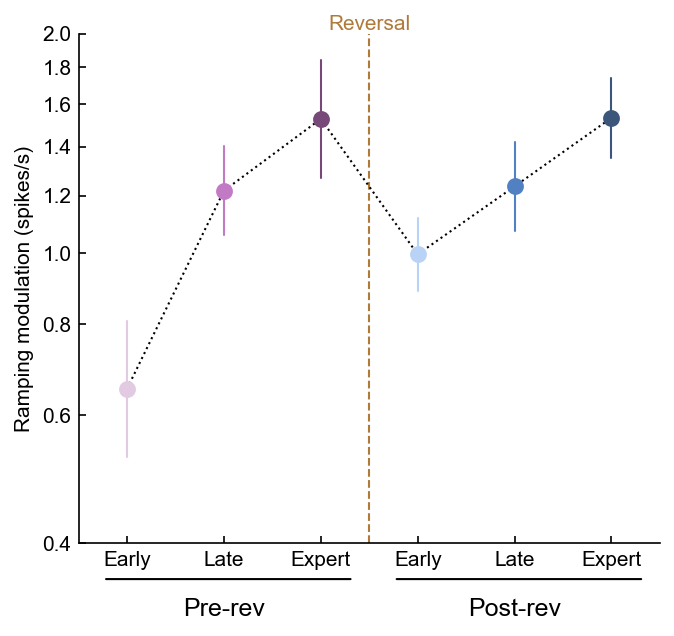

In [17]:
#Firing rate modulation graphs

size=5

FRmod_baseline_median = 3.4986225895316823#np.median(FRmod_preearly)
labels = ['Early','Late','Expert','Early','Late','Expert']
offset_distance = 0#0.05

fig, ax = plt.subplots(figsize=(5,4.5)) #5/3 with height of 4.5

data = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
data = [np.log10(ilep.rmnan(np.abs(d),positiveOnly=True)) for d in data]
#num_animals = [preearly_animals_num,prelate_animals_num,preexpert_animals_num,postearly_animals_num,postlate_animals_num,postexpert_animals_num]
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

#ax.scatter(X-0.125, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    eye_color = PHASE_COLORS[idx]
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    
    #eye_color='k'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.mean(col) for col in data]
plt.plot(np.linspace(0,5,6)-offset_distance,medians,color='k',linestyle=':',lw=1)
    

    

    
    
    
    
    

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
#
#ax.set_ylim([0.1,100])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Ramping modulation (spikes/s)')
#ax.set_ylim([2,10])
#ax.set_yticks([2,4,6,8,10])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

ticks = [0.6,0.4,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
ax.set_yticks(np.log10(ticks))
ax.set_yticklabels(ticks)
#ax.set_ylim([np.log10(0.8),np.log10(1.8)])


xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.0125
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.04, -0.07), xycoords='axes fraction', xytext=(0.475, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -0.07), xycoords='axes fraction', xytext=(0.975, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of log of ramping over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(t1,t2), bbox_inches='tight')

In [22]:
data = SimpleNamespace(preearly=ilep.rmnan(Ramping_preearly),
prelate=ilep.rmnan(Ramping_prelate),
preexpert=ilep.rmnan(Ramping_preexpert),
postearly=ilep.rmnan(Ramping_postearly),
postlate=ilep.rmnan(Ramping_postlate),
postexpert=ilep.rmnan(Ramping_postexpert)
)
ilep.nonparametricIndependentStatsCompareToPreearly(data)
pass

            Source           SS     DF          MS          F     p-unc  \
0            phase   126.371754    4.0   31.592939   2.464931  0.043806   
1          context   233.456279    1.0  233.456279  18.214630  0.000022   
2  phase * context    30.521627    4.0    7.630407   0.595336  0.666114   
3         Residual  9343.567576  729.0   12.816965        NaN       NaN   

        np2  
0  0.013345  
1  0.024377  
2  0.003256  
3       NaN  

          phase         A             B     p-unc    p-corr    hedges
11   post-early  baseline  experimental  0.031829  0.031829 -0.237456
12  post-expert  baseline  experimental  0.000787  0.002417 -0.476250
13    post-late  baseline  experimental  0.003657  0.006094 -0.405889
14   pre-expert  baseline  experimental  0.000967  0.002417 -0.492130
15     pre-late  baseline  experimental  0.005515  0.006894 -0.379946


<ipython-input-28-fab2bc4a8f72>:18: RuntimeWarning: invalid value encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)


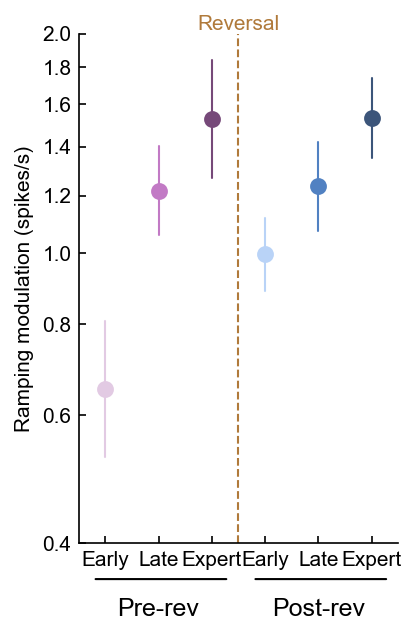

In [28]:
#Firing rate modulation graphs

size=5

FRmod_baseline_median = 3.4986225895316823#np.median(FRmod_preearly)
labels = ['Early','Late','Expert','Early','Late','Expert']
offset_distance = 0#0.05

fig, ax = plt.subplots(figsize=(2.75,4.5)) #5/3 with height of 4.5

data = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
data = [np.log10(ilep.rmnan(np.abs(d),positiveOnly=True)) for d in data]
#num_animals = [preearly_animals_num,prelate_animals_num,preexpert_animals_num,postearly_animals_num,postlate_animals_num,postexpert_animals_num]
numCon = len(data)
X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

#ax.scatter(X-0.125, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    #eye_color=NCR_CR_cmap((percentCR-40)/20)
    eye_color = PHASE_COLORS[idx]
    
    r,g,b = mpl.colors.to_rgb(eye_color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    border_color=eye_color#colorsys.hls_to_rgb(h,l*0.5,s)
    
    #eye_color='k'
    #border_color='k'

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    median = np.mean(column)
    Q1 = median - sem(column)
    Q3 = median + sem(column)
    
    ax.scatter([idx-offset_distance], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx-offset_distance, idx-offset_distance], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q1, Q1], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    #ax.plot([idx-offset_distance-0.05, idx-offset_distance+0.05], [Q3, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
# medians = [np.mean(col) for col in data]
# plt.plot(np.linspace(0,5,6)-offset_distance,medians,color='k',linestyle=':',lw=1)
    

    

    
    
    
    
    

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=-10,lw=1)
#
#ax.set_ylim([0.1,100])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Ramping modulation (spikes/s)')
#ax.set_ylim([2,10])
#ax.set_yticks([2,4,6,8,10])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

ticks = [0.6,0.4,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
ax.set_yticks(np.log10(ticks))
ax.set_yticklabels(ticks)
#ax.set_ylim([np.log10(0.8),np.log10(1.8)])


xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.0125
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.04, -0.07), xycoords='axes fraction', xytext=(0.475, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -0.07), xycoords='axes fraction', xytext=(0.975, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')

fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of log of ramping over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(t1,t2), bbox_inches='tight')